Loading training and testing datasets...
Datasets loaded successfully!
Defining base models...
Initializing the stacking model...
Training the stacking model...
Model training complete!
Generating predictions...
Evaluating the model...
Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    163240
           1       0.33      0.59      0.42       930

    accuracy                           0.99    164170
   macro avg       0.66      0.79      0.71    164170
weighted avg       0.99      0.99      0.99    164170

Visualizing the confusion matrix...


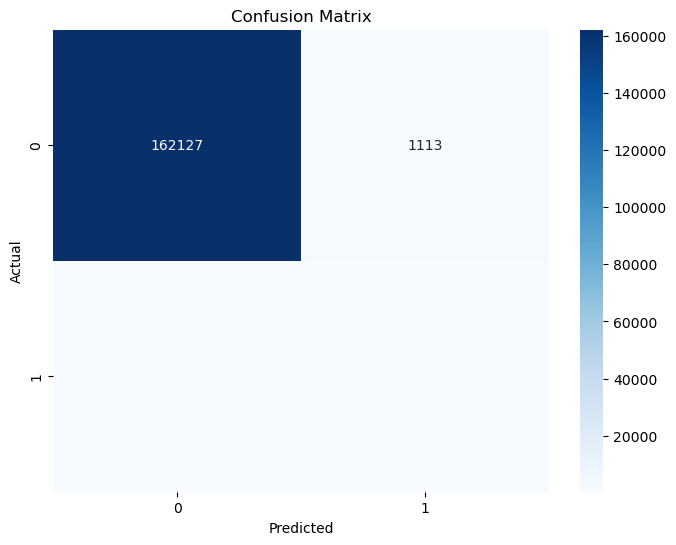

Adding detailed confusion matrix summary...

Confusion Matrix Summary:

            Actual/Predicted Predicted: No (0)  Predicted: Yes (1)  \
0             Actual: No (0)            162127                1113   
1            Actual: Yes (1)               384                 546   
2  Fraud Cases Detected (TP)                                   546   

                        Total  
0           163240 (Total No)  
1             930 (Total Yes)  
2  546 (Total Fraud Detected)  
Saving the model to disk...
Model saved at C:/Users/nraja/OneDrive/Documents/Datamining/Project\stacking_model.pkl


In [2]:

# Load libraries
# Let's get the necessary libraries for our stacking model and evaluation
import os
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load data files
# The training and testing files should already be in the data folder.
training_file_path = 'C:/Users/nraja/OneDrive/Documents/Datamining/Project/data-training.csv'
testing_file_path = 'C:/Users/nraja/OneDrive/Documents/Datamining/Project/data-testing.csv'

# Read the CSV files into DataFrames
print("Loading training and testing datasets...")
train_df = pd.read_csv(training_file_path)
test_df = pd.read_csv(testing_file_path)
print("Datasets loaded successfully!")

# Splitting features and target
# The first column in the dataset is the target, and the rest are features.
X_train = train_df.iloc[:, 1:]  # All columns except the first are features
y_train = train_df.iloc[:, 0]   # First column is the target (fraud/non-fraud)

X_test = test_df.iloc[:, 1:]
y_test = test_df.iloc[:, 0]

# Define the base models for stacking
# We're using logistic regression models as the base learners.
print("Defining base models...")
base_models = [
    ('logistic_model_1', LogisticRegression(max_iter=500)),
    ('logistic_model_2', LogisticRegression(max_iter=500))
]

# Define the meta-model (stacking model)
# This is the model that combines predictions from the base models.
meta_model = LogisticRegression(max_iter=500)

# Initialize the Stacking Classifier
print("Initializing the stacking model...")
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
print("Training the stacking model...")
stacking_model.fit(X_train, y_train)
print("Model training complete!")

# Make predictions on the test set
print("Generating predictions...")
y_pred = stacking_model.predict(X_test)

# Evaluate the model's performance
# Let's calculate accuracy, classification report, and confusion matrix.
print("Evaluating the model...")
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_rep)

# Display the confusion matrix as a heatmap
print("Visualizing the confusion matrix...")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Add a detailed summary of the confusion matrix
print("Adding detailed confusion matrix summary...")
conf_matrix_values = {
    "Actual/Predicted": ["Actual: No (0)", "Actual: Yes (1)", "Fraud Cases Detected (TP)"],
    "Predicted: No (0)": [conf_matrix[0, 0], conf_matrix[1, 0], ""],
    "Predicted: Yes (1)": [conf_matrix[0, 1], conf_matrix[1, 1], conf_matrix[1, 1]],
    "Total": [
        f"{conf_matrix[0, 0] + conf_matrix[0, 1]} (Total No)",
        f"{conf_matrix[1, 0] + conf_matrix[1, 1]} (Total Yes)",
        f"{conf_matrix[1, 1]} (Total Fraud Detected)"
    ]
}

conf_matrix_df = pd.DataFrame(conf_matrix_values)
print("\nConfusion Matrix Summary:\n")
print(conf_matrix_df)

# Save the trained stacking model
# This will save the model to the same directory as the training data.
print("Saving the model to disk...")
model_save_path = os.path.join(os.path.dirname(training_file_path), 'stacking_model.pkl')
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
joblib.dump(stacking_model, model_save_path)
print(f"Model saved at {model_save_path}")
